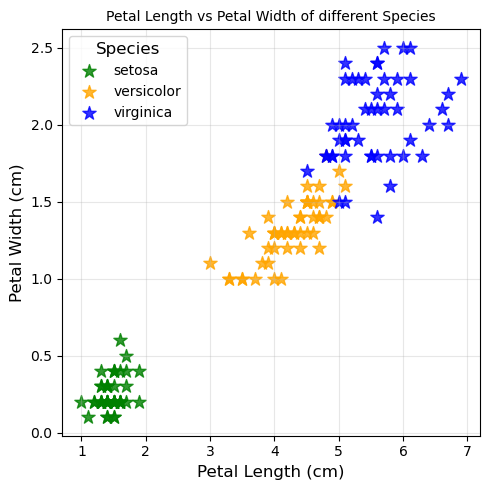

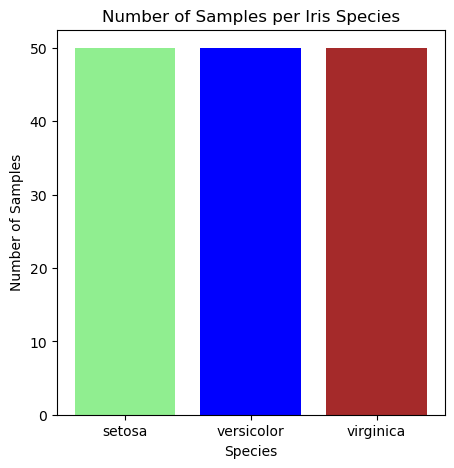

Enter the following measurements for the Iris flower:
Sepal Length (cm): 1.2
Sepal Width (cm): 3.2
Petal Length (cm): 2.6
Petal Width (cm): 3.2

The predicted species is: versicolor
Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Score: 0.9666666666666668


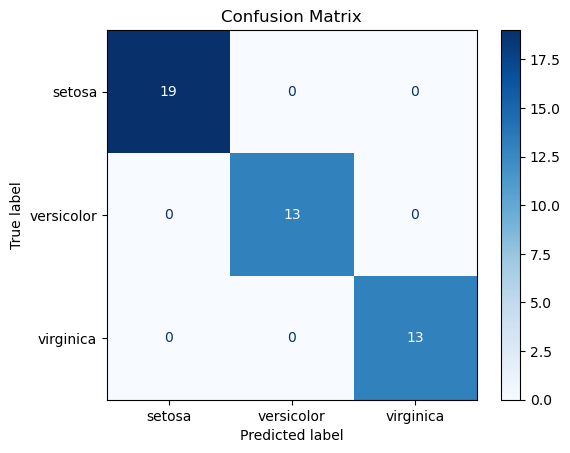

In [3]:
# Here, i importing necessary libraries for given task
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Here, i load the given dataset
iris = load_iris()

# Here, i prepare features and target variables for given task
X = iris.data
y = iris.target

# Here, i split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Here, i train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Here,Scatter Plot for Petal Length vs Petal Width of different Species
plt.figure(figsize=(5, 5))
markers = ['*', '*', '*']  
colors = ['green', 'orange', 'blue']
for species in np.unique(y):
    plt.scatter(
        X[y == species, 2],  #Petal length
        X[y == species, 3],  # Petal width
        color=colors[species], 
        marker=markers[species], 
        label=iris.target_names[species],
        s=100,                # Point size
        alpha=0.8             # Transparency
    )
plt.title("Petal Length vs Petal Width of different Species", fontsize=10)
plt.xlabel("Petal Length (cm)", fontsize=12)
plt.ylabel("Petal Width (cm)", fontsize=12)
plt.legend(title="Species", fontsize=10, title_fontsize=12, loc="upper left")
plt.grid(alpha=0.3) 
plt.tight_layout()
plt.show()

# Here,Bar Chart for Number of Samples per Species
plt.figure(figsize=(5, 5))
species, counts = np.unique(y, return_counts=True)
plt.bar(iris.target_names, counts, color=["lightgreen", "blue", "brown"])
plt.title("Number of Samples per Iris Species")
plt.xlabel("Species")
plt.ylabel("Number of Samples")
plt.show()

# Here, we give manual input for lenth and width
print("Enter the following measurements for the Iris flower:")
try:
    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width = float(input("Sepal Width (cm): "))
    petal_length = float(input("Petal Length (cm): "))
    petal_width = float(input("Petal Width (cm): "))
    user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # From here prediction start
    prediction = model.predict(user_input)
    predicted_species = iris.target_names[prediction[0]]
    
    print(f"\nThe predicted species is: {predicted_species}")
except ValueError:
    print("\nInvalid input! Please enter numerical values for all measurements.")

# Here, cross-validation 
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:",scores)
print("Mean CV Score:", np.mean(scores))


# Here, prediction is genereted
y_pred = model.predict(X_test)

# Here, i create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
